## INPUT 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as Linear_model
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("dataset_project.csv")

In [5]:
df #simple

,year,area,production,productivity,rainfall,temperature
0,1950,75,5009,66.79,932.6,23.71
1,1951,84,5751,68.46,797.0,24.22
2,1952,73,4389,60.12,683.3,24.34
3,1953,71,5250,73.94,893.6,24.57
4,1954,74,5294,71.54,985.1,24.13
...,...,...,...,...,...,...
63,2013,937,76901,82.07,962.4,24.82
64,2014,1048,81870,78.12,838.0,24.73
65,2015,987,75087,76.08,644.5,24.91
66,2016,633,52262,82.56,906.3,26.45


In [8]:
df.head() #top data

,year,area,production,productivity,rainfall,temperature
0,1950,75,5009,66.79,932.6,23.71
1,1951,84,5751,68.46,797.0,24.22
2,1952,73,4389,60.12,683.3,24.34
3,1953,71,5250,73.94,893.6,24.57
4,1954,74,5294,71.54,985.1,24.13


In [49]:
df.describe()

,year,area,production,productivity,rainfall,temperature
count,68.00000,68.000000,68.000000,68.000000,68.000000,68.000000
mean,1983.50000,390.897059,31385.764706,78.792941,909.804412,24.453676
std,19.77372,294.741938,23816.851508,9.783098,148.574998,0.504141
min,1950.00000,71.000000,4389.000000,57.940000,519.900000,23.710000
25%,1966.75000,163.750000,11508.250000,71.505000,804.950000,24.117500
50%,1983.50000,292.000000,24537.000000,79.445000,917.850000,24.355000
75%,2000.25000,540.750000,44480.000000,85.680000,996.025000,24.670000
max,2017.00000,1093.000000,88437.000000,96.900000,1395.700000,26.650000


As mean of productivity is showing 78.79, so cutoff is taken as 80

In [10]:
df.shape

(68, 6)

## SCATTERPLOT

<AxesSubplot:xlabel='rainfall', ylabel='productivity'>

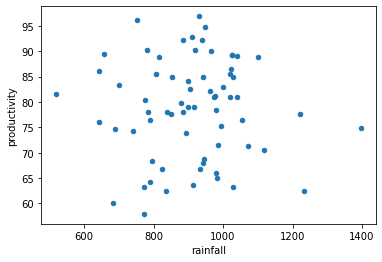

In [12]:
df.plot(kind='scatter',x='rainfall',y='productivity') #replace the variables like area, prod, temp, ranfall in x and y

## CORRELATION COEFFICIENT

In [13]:
df.corr()

,year,area,production,productivity,rainfall,temperature
year,1.000000,0.899007,0.898056,0.321123,-0.005620,0.674130
area,0.899007,1.000000,0.992131,0.206226,0.064036,0.653876
production,0.898056,0.992131,1.000000,0.308853,0.067100,0.635293
productivity,0.321123,0.206226,0.308853,1.000000,-0.010447,0.069827
rainfall,-0.005620,0.064036,0.067100,-0.010447,1.000000,0.070621
temperature,0.674130,0.653876,0.635293,0.069827,0.070621,1.000000


## HEAT MAP

<AxesSubplot:>

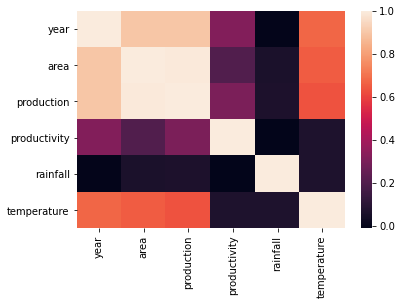

In [14]:
sns.heatmap(df.corr())

## Multiple linear Regression

In [30]:
df1= pd.DataFrame(df,columns= ['year','area','production', 'rainfall', 'temperature'])

In [31]:
X = df[['area','rainfall','temperature']]
Y = df[['production']]

In [32]:
from sklearn import linear_model #sklearn

In [33]:
#creating multiple linear regression model
mlr = linear_model.LinearRegression()
model = mlr.fit(X,Y)

In [40]:
model

LinearRegression()

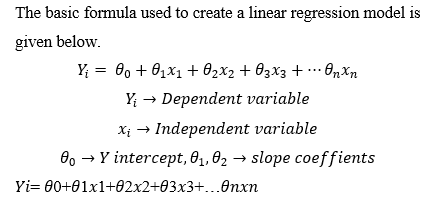

In [37]:
model.coef_ #Ø1,2,3

array([[ 8.13994521e+01,  6.83962420e-01, -1.11911611e+03]])

In [38]:
model.intercept_ #Ø0

array([26311.18961447])

In [39]:
#predicting new values;asking
new_area = 900
new_rain = 71.5
new_temp = 27

In [42]:
mlr.predict([[new_area,new_rain,new_temp]]) #getting the value of Y

array([[69403.46479265]])

Text(0.5, 1.0, 'Production vs Area')

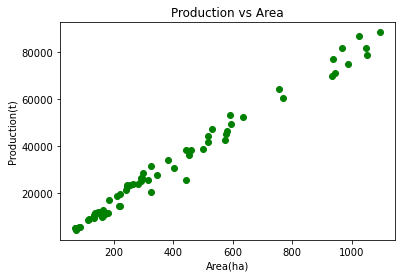

In [48]:
#second method to get scatterplot to get ___ vs production; so everytime change with area,rainfall and temp
plt.scatter(df['area'].astype(float),df['production'].astype(float), color="green")
plt.xlabel("Area(ha)")
plt.ylabel("Production(t)")
plt.title("Production vs Area")  #title
#note that this is without plt.show()
#plt.plot(X,model.predict(X), color="red", linewidth=0.5)

## SVM

In [77]:
from sklearn.model_selection import train_test_split
from sklearn import svm, datasets

In [78]:
# deciding cutoff for productivity for low and high
def new_type(row):
  if(row['productivity'])>=80:
    val = "high"
  else:
    val = "low"
  return val

In [79]:
df['productivity_type']= df.apply(new_type, axis=1)
df.head()

,year,area,production,productivity,rainfall,temperature,productivity_type,Target
0,1950,75,5009,66.79,932.6,23.71,low,0.0
1,1951,84,5751,68.46,797.0,24.22,low,0.0
2,1952,73,4389,60.12,683.3,24.34,low,0.0
3,1953,71,5250,73.94,893.6,24.57,low,0.0
4,1954,74,5294,71.54,985.1,24.13,low,0.0


In [80]:
#total number of count of low and high productivity
df.productivity_type.value_counts()

low     35
high    33
Name: productivity_type, dtype: int64

In [81]:
# Assigning target value repective to productivity type 
df.loc[df['productivity_type'] == 'high', 'Target'] = 1
df.loc[df['productivity_type'] == 'low', 'Target'] = 0
df

,year,area,production,productivity,rainfall,temperature,productivity_type,Target
0,1950,75,5009,66.79,932.6,23.71,low,0.0
1,1951,84,5751,68.46,797.0,24.22,low,0.0
2,1952,73,4389,60.12,683.3,24.34,low,0.0
3,1953,71,5250,73.94,893.6,24.57,low,0.0
4,1954,74,5294,71.54,985.1,24.13,low,0.0
...,...,...,...,...,...,...,...,...
63,2013,937,76901,82.07,962.4,24.82,high,1.0
64,2014,1048,81870,78.12,838.0,24.73,low,0.0
65,2015,987,75087,76.08,644.5,24.91,low,0.0
66,2016,633,52262,82.56,906.3,26.45,high,1.0


In [82]:
#value coming out same as productivity type
df.Target.value_counts()

0.0    35
1.0    33
Name: Target, dtype: int64

In [83]:
# Clustering low and high productivity 
df0 = df[df.Target == 0]
df1 = df[df.Target == 1]

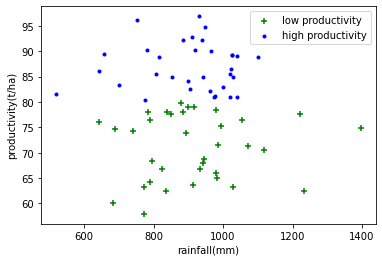

In [84]:
#visualising dataset 
plt.xlabel('rainfall(mm)')
plt.ylabel('productivity(t/ha)')
plt.scatter(df0['rainfall'], df0['productivity'],color="green",marker='+')
plt.scatter(df1['rainfall'], df1['productivity'],color="blue",marker='.')
plt.legend(["low productivity ","high productivity"])
plt.show()
#keeping productivity at y axis constant; we can replace x_axis with area, temp, rainfall or production

In [85]:
# Dropping dropping Target column and productivity
x = df.drop(["productivity_type","Target"],axis = "columns")
x.head()

,year,area,production,productivity,rainfall,temperature
0,1950,75,5009,66.79,932.6,23.71
1,1951,84,5751,68.46,797.0,24.22
2,1952,73,4389,60.12,683.3,24.34
3,1953,71,5250,73.94,893.6,24.57
4,1954,74,5294,71.54,985.1,24.13


In [86]:
y = df.Target
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Target, dtype: float64

In [87]:
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state = 10)

In [88]:
# Applying SVM with all possible kernal to know accuracy
kernel = ["linear","rbf","poly","sigmoid"]
for i in kernel:
  model = svm.SVC(kernel = i, C = 10, gamma = 1)
  model.fit(X_train,y_train)
  
  print("for kenal :",i)
  print("Accurcay is :", model.score(X_test, y_test))

for kenal : linear
Accurcay is : 0.9285714285714286
for kenal : rbf
Accurcay is : 0.35714285714285715
for kenal : poly
Accurcay is : 0.9285714285714286
for kenal : sigmoid
Accurcay is : 0.35714285714285715


In the SVM model, polynomial kernal is giving high accuracy at C=10 and gamma = 1

## Random Forest

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [105]:
# deciding cutoff for productivity for low and high
def new_type(row):
  if(row['productivity'])>=85:
    val = "high"
  elif (row['productivity'])<70:
    val = "low"
  else:
    val = "medium"
  return val

In [98]:
df['productivity_type']= df.apply(new_type, axis=1)
df.head()

,year,area,production,productivity,rainfall,temperature,productivity_type,Target
0,1950,75,5009,66.79,932.6,23.71,low,0.0
1,1951,84,5751,68.46,797.0,24.22,low,0.0
2,1952,73,4389,60.12,683.3,24.34,low,0.0
3,1953,71,5250,73.94,893.6,24.57,medium,0.0
4,1954,74,5294,71.54,985.1,24.13,medium,0.0


In [99]:
# Assigning target value repective to productivity type 
df.loc[df['productivity_type'] == 'high', 'Target'] = 2
df.loc[df['productivity_type'] == 'medium', 'Target'] = 1
df.loc[df['productivity_type'] == 'low', 'Target'] = 0
df

,year,area,production,productivity,rainfall,temperature,productivity_type,Target
0,1950,75,5009,66.79,932.6,23.71,low,0.0
1,1951,84,5751,68.46,797.0,24.22,low,0.0
2,1952,73,4389,60.12,683.3,24.34,low,0.0
3,1953,71,5250,73.94,893.6,24.57,medium,1.0
4,1954,74,5294,71.54,985.1,24.13,medium,1.0
...,...,...,...,...,...,...,...,...
63,2013,937,76901,82.07,962.4,24.82,medium,1.0
64,2014,1048,81870,78.12,838.0,24.73,medium,1.0
65,2015,987,75087,76.08,644.5,24.91,medium,1.0
66,2016,633,52262,82.56,906.3,26.45,medium,1.0


In [100]:
# Dropping dropping Target column and productivity
x = df.drop(["productivity_type","Target"],axis = "columns")

y = df.Target

X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state = 0)

In [101]:
model = RandomForestRegressor(n_estimators=50)
model.fit(X_train,y_train)

RandomForestRegressor(n_estimators=50)

In [102]:
model.score(X_test,y_test)

0.9995333333333334

In [103]:
y_pred = model.predict(X_test)
y_pred

array([2.  , 2.  , 2.  , 1.  , 2.  , 1.  , 2.  , 1.04, 1.  , 1.  , 2.  ,
       1.  , 1.  , 1.  ])

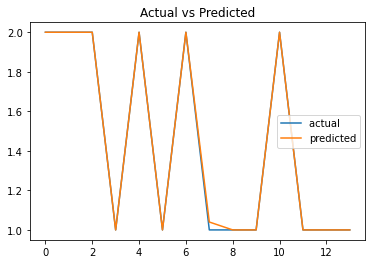

In [106]:
dm = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).reset_index()
x_axis=dm.index
y_axis=dm.Actual
y1_axis=dm.Predicted
plt.plot(x_axis,y_axis)
plt.plot(x_axis,y1_axis)
plt.title("Actual vs Predicted")
plt.legend(["actual ","predicted"])
plt.show()

In [107]:
dm

,index,Actual,Predicted
0,48,2.0,2.00
1,27,2.0,2.00
2,32,2.0,2.00
3,22,1.0,1.00
4,31,2.0,2.00
5,45,1.0,1.00
6,30,2.0,2.00
7,60,1.0,1.04
8,55,1.0,1.00
9,62,1.0,1.00
